Graph Plot


In [101]:
import matplotlib.pyplot as plt


def roc_plot(y_test, y_pred):
    from sklearn.metrics import roc_curve, auc
    from sklearn.preprocessing import label_binarize
    from itertools import cycle

    hand_name = {
        0: 'Nothing in hand',
        1: 'One pair',
        2: 'Two pairs',
        3: 'Three of a kind',
        4: 'Straight',
        5: 'Flush',
        6: 'Full house',
        7: 'Four of a kind',
        8: 'Straight flush',
        9: 'Royal flush',
    }

    y_test = label_binarize(y_test, classes=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
    n_classes = y_test.shape[1]

    fpr, tpr, roc_auc = dict(), dict(), dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    colors = cycle(['red', 'purple', 'green', 'orange', 'blue',
                   'brown', 'pink', 'gray', 'olive', 'cyan'])
    plt.figure(figsize=(20, 20))
    for i, color in zip(range(n_classes), colors):
        plt.subplot(4, 3, i + 1)
        plt.plot(fpr[i], tpr[i], color=color, lw=2,
                 label=f'{i}. {hand_name[i]} (area = {roc_auc[i]:.2f})')

        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlim([-.05, 1.05])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Poker Hands ROC')
        plt.legend(loc='lower right')
    
    plt.tight_layout()
    plt.show(block=True)

Neural Network


In [102]:
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

cols = ["S1", "C1", "S2", "C2", "S3", "C3", "S4", "C4", "S5", "C5", "CLASS"]

df = pd.read_csv('./data/poker-hand-testing.data', names=cols)

x = df.iloc[:, :10].values
y = df['CLASS'].values

# scaler = StandardScaler().fit(x)
# x = scaler.transform(x)

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=.2, stratify=y, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(
    x_train, y_train, test_size=.25, stratify=y_train, random_state=42)

# class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
# class_weights = {i: class_weights[i] for i in range(len(class_weights))}

y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_val = tf.keras.utils.to_categorical(y_val, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(
    64, input_shape=(10,), kernel_initializer='uniform'))
model.add(tf.keras.layers.LeakyReLU())
model.add(tf.keras.layers.Dense(32, kernel_initializer='uniform'))
model.add(tf.keras.layers.LeakyReLU())
model.add(tf.keras.layers.Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer='adam', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=100, validation_data=(x_val, y_val),
          callbacks=tf.keras.callbacks.EarlyStopping(monitor='val_loss', verbose=1), verbose=1)
y_pred = model.predict(x_test)

Epoch 1/100
18750/18750 [==============================] - 20s 1ms/step - loss: 0.9388 - accuracy: 0.5521 - val_loss: 0.8830 - val_accuracy: 0.5919
Epoch 2/100
18750/18750 [==============================] - 18s 960us/step - loss: 0.8454 - accuracy: 0.6182 - val_loss: 0.7968 - val_accuracy: 0.6498
Epoch 3/100
18750/18750 [==============================] - 20s 1ms/step - loss: 0.7616 - accuracy: 0.6640 - val_loss: 0.7700 - val_accuracy: 0.6494
Epoch 4/100
18750/18750 [==============================] - 23s 1ms/step - loss: 0.6852 - accuracy: 0.7056 - val_loss: 0.6727 - val_accuracy: 0.7043
Epoch 5/100
18750/18750 [==============================] - 22s 1ms/step - loss: 0.6075 - accuracy: 0.7475 - val_loss: 0.5464 - val_accuracy: 0.7675
Epoch 6/100
18750/18750 [==============================] - 22s 1ms/step - loss: 0.5318 - accuracy: 0.7864 - val_loss: 0.4767 - val_accuracy: 0.8322
Epoch 7/100
18750/18750 [==============================] - 22s 1ms/step - loss: 0.4620 - accuracy: 0.8208 - va

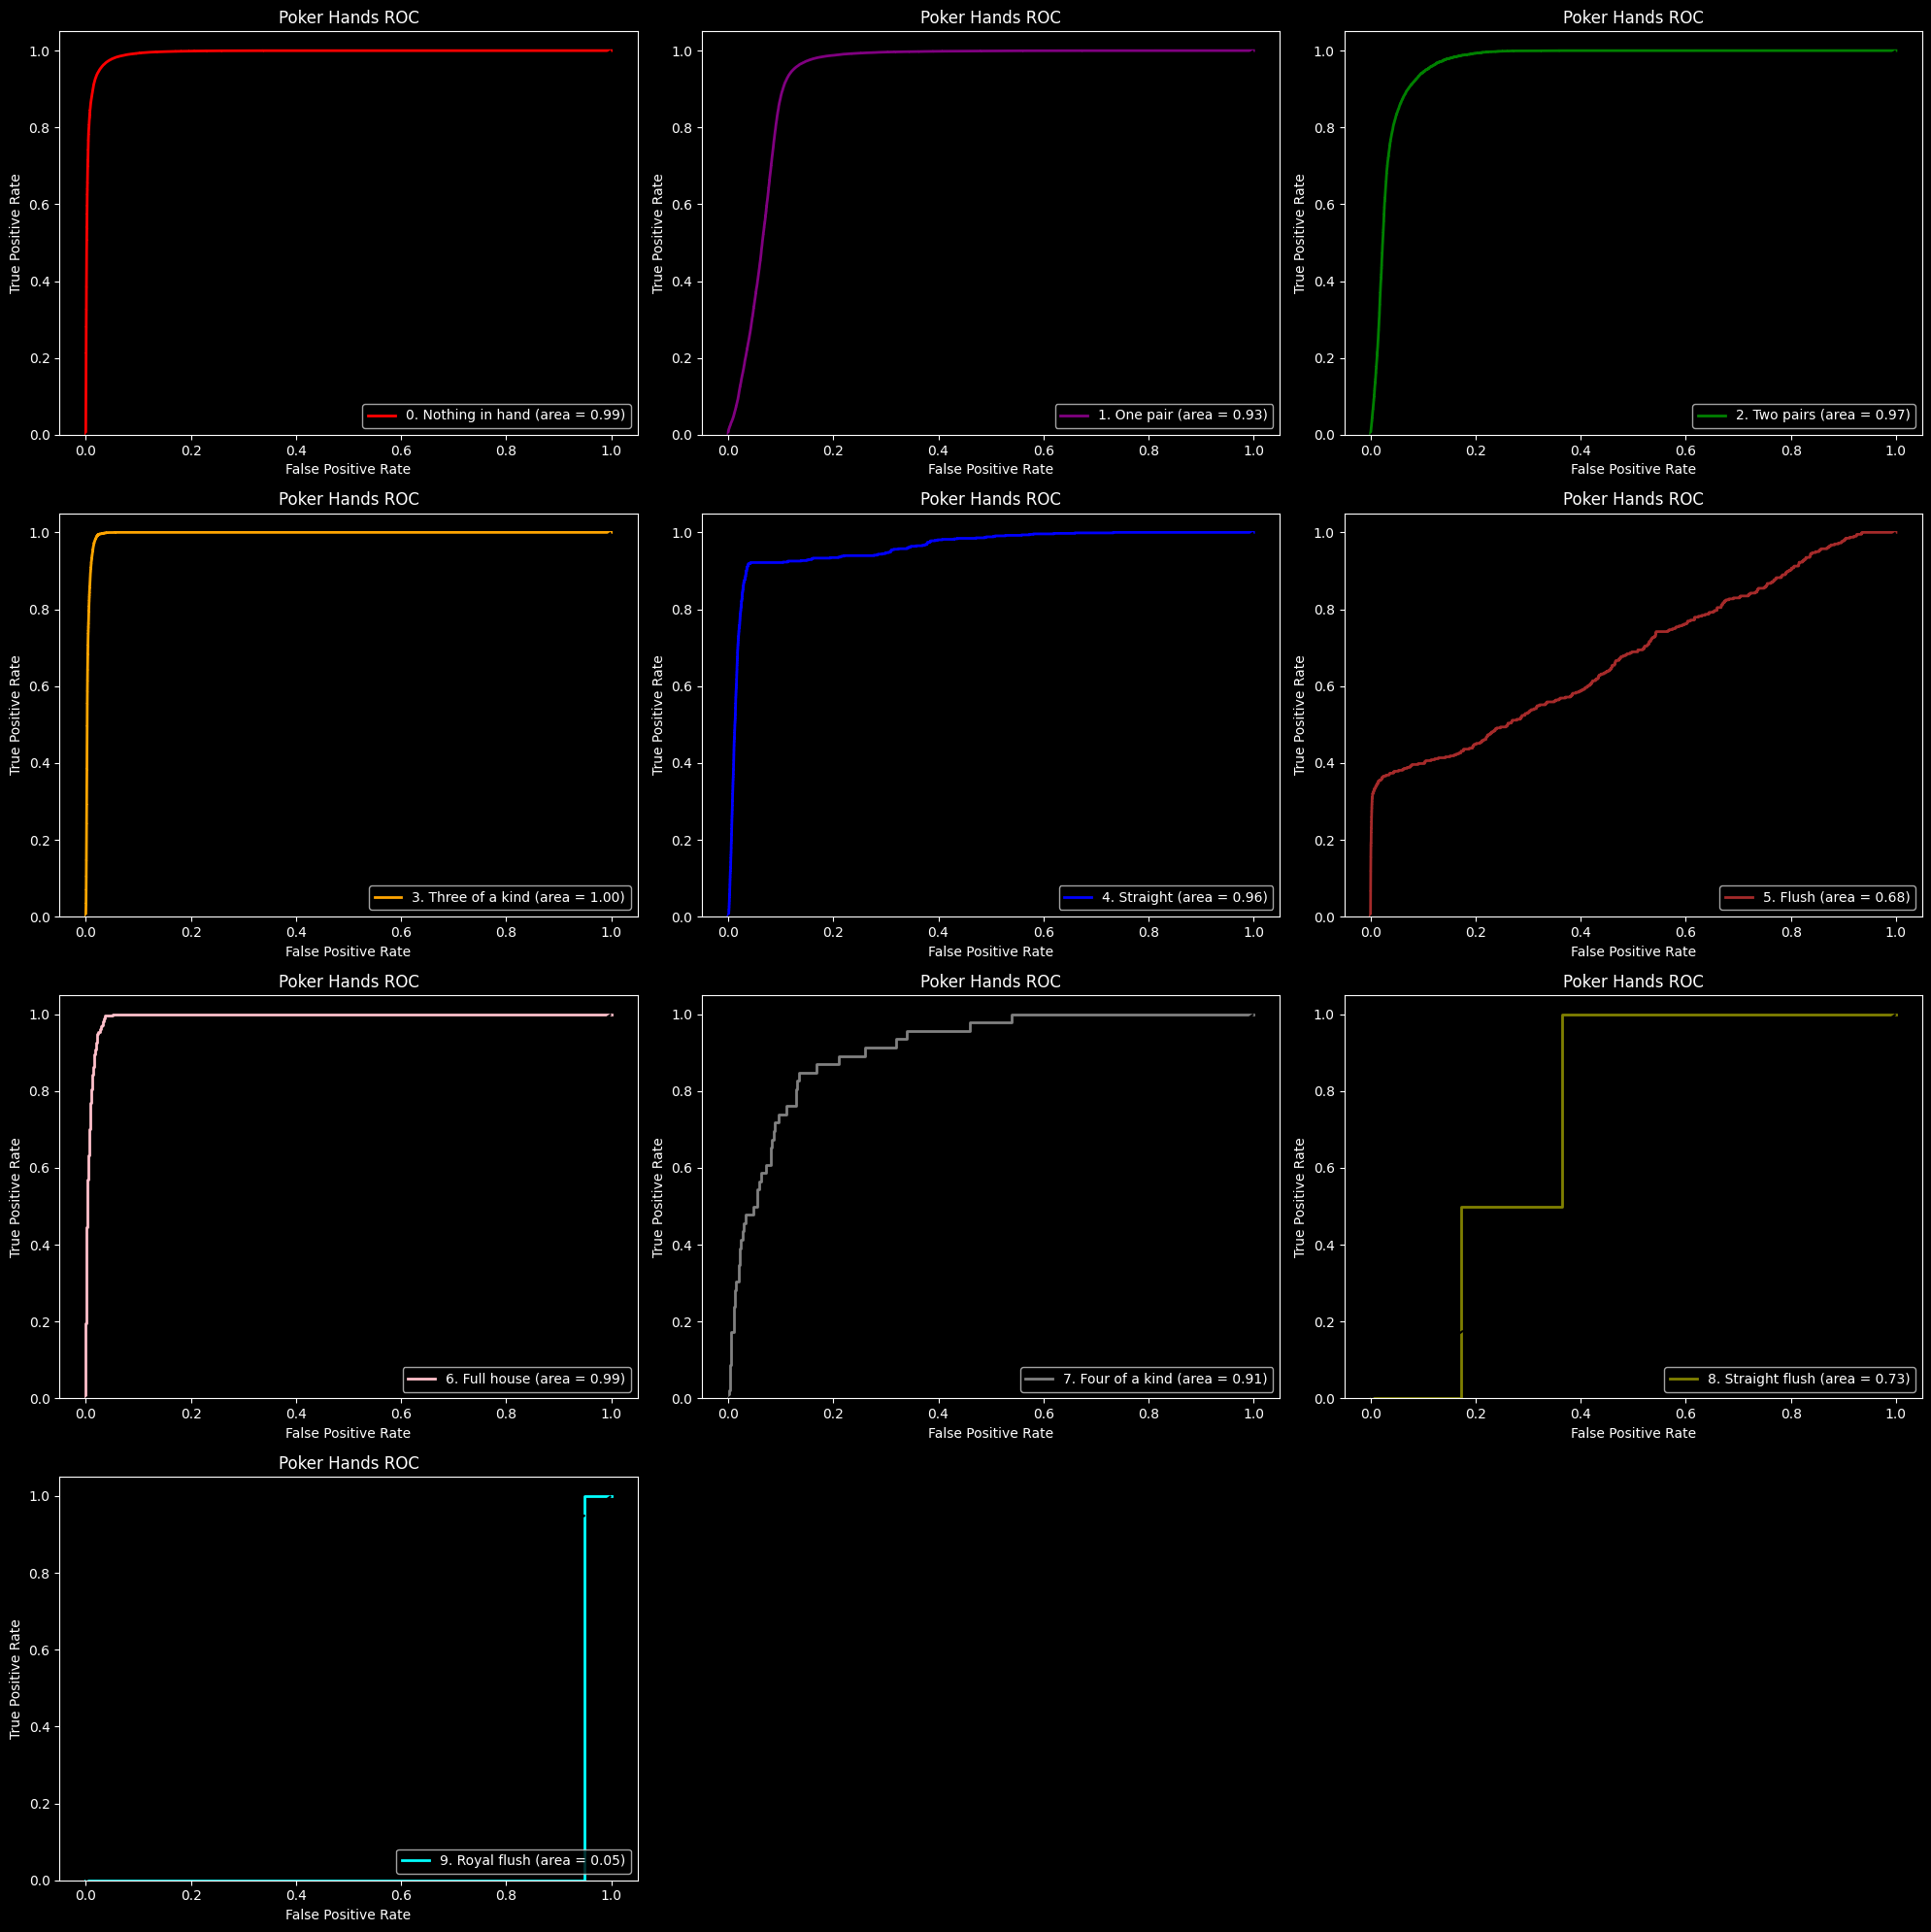

              precision    recall  f1-score   support

           0      0.745     1.000     0.854    100242
           1      0.846     0.606     0.706     84500
           2      0.414     0.093     0.151      9524
           3      0.803     0.509     0.623      4224
           4      0.023     0.003     0.005       777
           5      0.286     0.005     0.010       399
           6      1.000     0.000     0.000       285
           7      1.000     0.000     0.000        46
           8      1.000     0.000     0.000         2
           9      1.000     0.000     0.000         1

    accuracy                          0.772    200000
   macro avg      0.712     0.222     0.235    200000
weighted avg      0.770     0.772     0.747    200000



In [103]:
roc_plot(y_test, y_pred)

y_pred = np.argmax(y_pred, axis=1)
y_test = np.argmax(y_test, axis=1)

print(classification_report(y_test, y_pred, digits=3, zero_division=1))